Legend


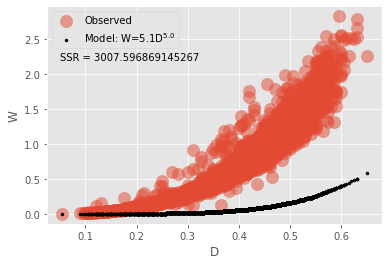

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

filename = "provided/abalone.data.txt"
# x and y coordinates, whitespace-separated
X = np.loadtxt(filename, delimiter=',', usecols=(2, 4))


class Abalone_Data(object):
    def __init__(self, data):
        self.data_diameter = data[:, 0]
        self.data_weight = data[:, 1]


class Abalone(Abalone_Data):
    def __init__(self, abalone_data, a, b):
        self.data = Abalone_Data(abalone_data)
        self.a = a
        self.b = b
        self.mansonmodel = self.model(self.data.data_diameter, a, b)
        self.ssr = self.SSR(self.mansonmodel, self.data.data_weight)
        self.ssr_str = r'SSR = ' + str(self.ssr)
        self.plot = self.generate_plot()

    def SSR(self, y_observed, y_predicted):
        ssr = np.sum((y_observed - y_predicted)**2)
        return ssr

    def model(self, x, a, b):
        manson_model = a * x ** b  # model = 5.1 * X[:,0] ** 2
        return manson_model

    def generate_plot(self):
        plot = plt.scatter(X[:, 0], X[:, 1], marker='o', s=150, alpha=0.5, label='Observed')
        plot = plt.scatter(X[:, 0], self.mansonmodel, marker='.', color='black',
                    label=r'Model: W=' + str(self.a) + r'D$^{' + str(self.b) + r'}$')
        plot = plt.text(0.05, 2.2, self.ssr_str)
        plot = plt.xlabel('D')
        plot = plt.ylabel('W')
        plot = plt.legend()
        return plot

        # plt.savefig("abalone.png")
        # plt.clf()

abalone_dataset_first = Abalone(X, 5.1, 5.0)
#print(abalone_dataset_first.ssr_str)
print(abalone_dataset_first.plot)


